In [1]:
#We import the libraries we need.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#We now call the libraries we need for fits files that contain the image of our source.
from astropy.io import fits
from astropy.visualization import simple_norm
from astropy.visualization import LogStretch
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm

In [3]:
#We also import the following libraries to plot the coordinates in the Image.
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes

In [4]:
#We call the datafiles containing the images.
#POSS I: https://archive.stsci.edu/cgi-bin/dss_form
#ZTF: https://irsa.ipac.caltech.edu/applications/ztf/
file1 = '../../notebooks/toi2431-analysis/dss_search_toi2015'
file2 = "../../notebooks/toi2431-analysis/ztf_toi201520180722212986_000631_zr_c11_o_q2_sciimg_ra232.1329_dec27.3608_asec599.fits"

#The POSS I (Red) Image
with fits.open(file1) as hdul:
    image_data_1 = hdul[0].data
    header_1 = hdul[0].header

#The ZTF Image
with fits.open(file2) as hdul:
    image_data_2 = hdul[0].data
    header_2 = hdul[0].header

In [5]:
print(90 * "-")
print(f"Date of Observation for POSS I: {header_1['DATE-OBS']}")
print(90 * "-")
print(f"Date of Observation for ZTF: {header_2['CREATED']}")
print(90 * "-")

------------------------------------------------------------------------------------------
Date of Observation for POSS I: 1954-06-26T04:58:00
------------------------------------------------------------------------------------------
Date of Observation for ZTF: 2018-07-21T22:13:07
------------------------------------------------------------------------------------------


In [6]:
#We extract the WCS (World Coordinate System) Information from the header.
wcs1 = WCS(header_1)
wcs2 = WCS(header_2)

In [7]:
wcs1

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 229.01291666666665 29.462527777777776 
CRPIX : 6132.650187967141 4639.343477485849 
PC1_1 PC1_2  : 0.025281847548934932 5.386950770975609e-06 
PC2_1 PC2_2  : -4.1245841395731826e-06 0.025287151850498398 
CDELT : -0.01868055950628429 0.01868055950628429 
NAXIS : 530  530

In [8]:
wcs2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 231.8629587122 27.53759572182 
CRPIX : 1142.5 -339.5 
CD1_1 CD1_2  : -0.0002812652736471 3.124733069555e-06 
CD2_1 CD2_2  : -3.142116669061e-06 -0.0002812457127061 
NAXIS : 593  594

In [9]:
#We normalize the FITS image for better visibility
norm_1 = simple_norm(image_data_1, 'sqrt')
norm_2 = simple_norm(image_data_2, 'log', clip = True)

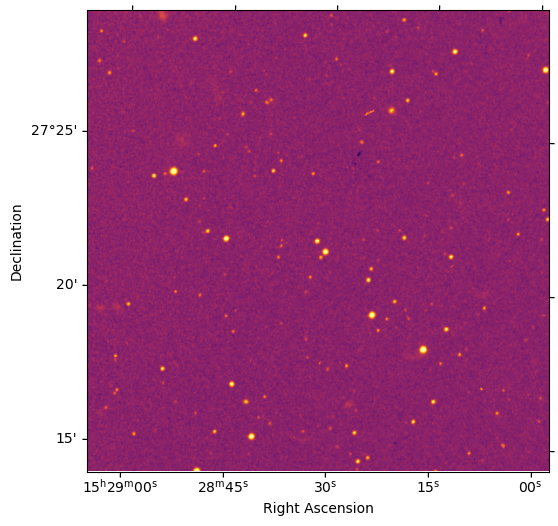

In [10]:
#We create the figure with the image.
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection = wcs1)
ax.imshow(image_data_1, cmap = "inferno", norm = norm_1)

#We also plot the coordinates.
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")

#We use TOI-2431's coordinates to plot its position.
#Taken from SIMBAD => ICRS Coordinate
toi_coords_1 = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')

#We then transform coordinates to pixel coordinates in order to plot them on the image.
pixel_coords_1 = wcs1.world_to_pixel(toi_coords_1)

#ax.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

plt.show()

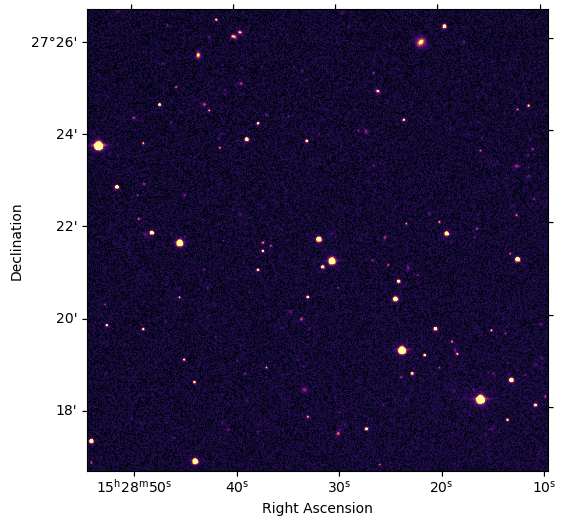

In [11]:
#We create the figure with the image.
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection = wcs2)
ax.imshow(image_data_2, cmap = "inferno", norm = LogNorm(vmin = np.percentile(image_data_2, 10),
                                                         vmax = np.percentile(image_data_2, 99.8)))

#We also plot the coordinates.
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")

#We use TOI-2431's coordinates to plot its position.
#Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')

#We then transform coordinates to pixel coordinates in order to plot them on the image.
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)


#ax.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)
ax.invert_yaxis()
plt.show()

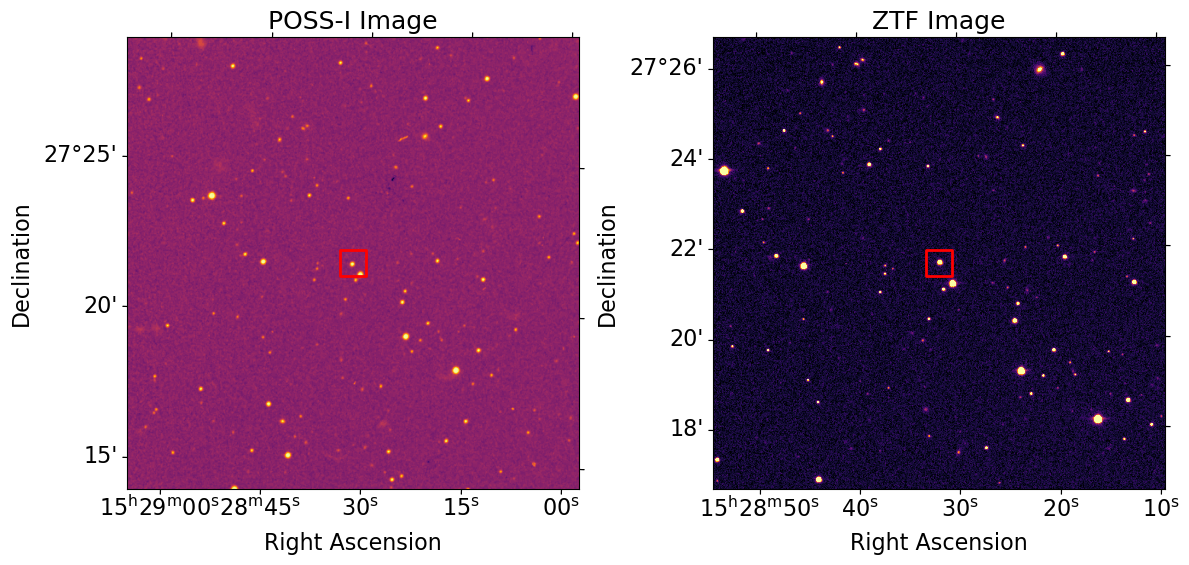

In [12]:
#We also create a panel-styled figure.
fig = plt.figure(figsize=(12, 6))

#The POSS I Image
ax1 = fig.add_subplot(121, projection = wcs1)
ax1.imshow(image_data_1, cmap="inferno", norm=norm_1)

ax1.set_xlabel("Right Ascension", fontsize = 16)
ax1.set_ylabel("Declination", fontsize = 16)
ax1.set_title("POSS-I Image", fontsize = 18)
ax1.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_1 = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')
pixel_coords_1 = wcs1.world_to_pixel(toi_coords_1)
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#The ZTF Image
ax2 = fig.add_subplot(122, projection = wcs2)
ax2.imshow(image_data_2, cmap = "inferno", norm = LogNorm(vmin = np.percentile(image_data_2, 10),
                                                          vmax = np.percentile(image_data_2, 99.8)))

ax2.set_xlabel("Right Ascension", fontsize = 16)
ax2.set_ylabel("Declination", fontsize = 16)
ax2.set_title("ZTF Image", fontsize = 18)
ax2.tick_params(axis = 'both', labelsize = 16)
ax2.invert_yaxis()

#Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

plt.tight_layout()
plt.show()

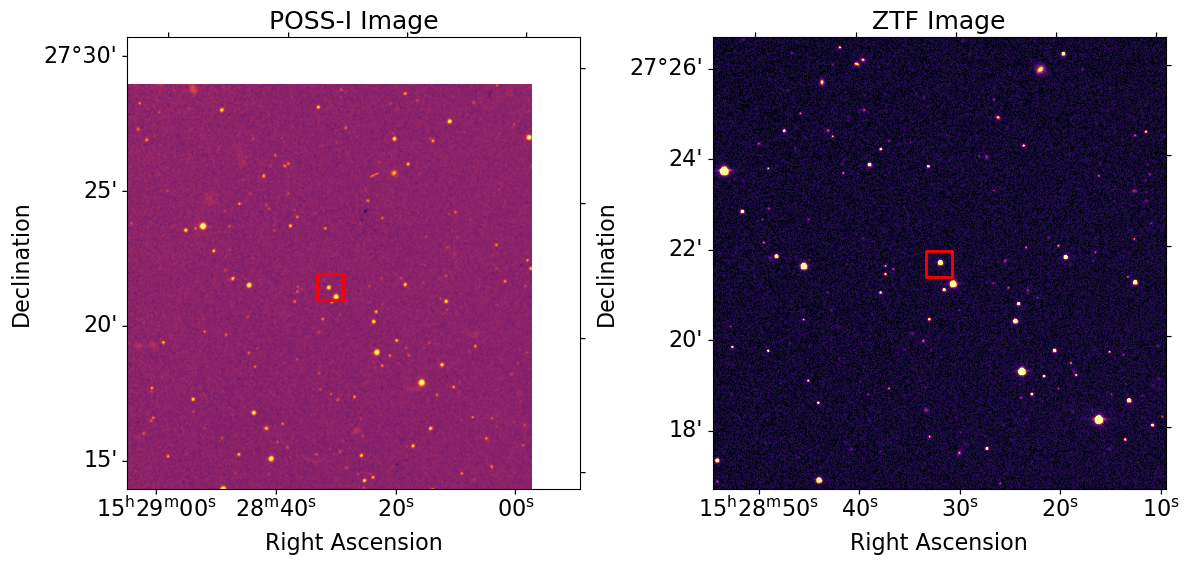

In [13]:
#We also create a panel-styled figure.
fig = plt.figure(figsize=(12, 6))

#The POSS I Image
ax1 = fig.add_subplot(121, projection = wcs1)
ax1.imshow(image_data_1, cmap="inferno", norm=norm_1)

ax1.set_xlabel("Right Ascension", fontsize = 16)
ax1.set_ylabel("Declination", fontsize = 16)
ax1.set_title("POSS-I Image", fontsize = 18)
ax1.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_1 = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')
pixel_coords_1 = wcs1.world_to_pixel(toi_coords_1)
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#The ZTF Image
ax2 = fig.add_subplot(122, projection = wcs2)
ax2.imshow(image_data_2, cmap = "inferno", norm = LogNorm(vmin = np.percentile(image_data_2, 10),
                                                          vmax = np.percentile(image_data_2, 99.8)))

ax2.set_xlabel("Right Ascension", fontsize = 16)
ax2.set_ylabel("Declination", fontsize = 16)
ax2.set_title("ZTF Image", fontsize = 18)
ax2.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#We set same x and y limits for both plots.
ax1.set_xlim(-0.5, 593.5)
ax1.set_ylim(-0.5, 592.5)

ax2.set_xlim(-0.5, 593.5)
ax2.set_ylim(-0.5, 592.5)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

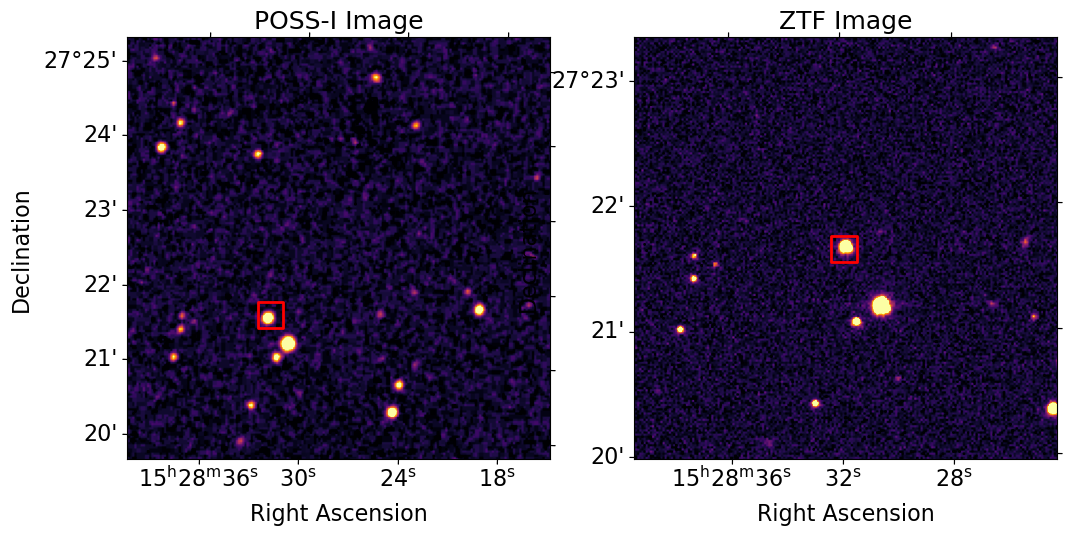

In [14]:
#We first set the limits of both images.
ax1.set_xlim(-0.5, 593.5)
ax1.set_ylim(-0.5, 592.5)

ax2.set_xlim(-0.5, 593.5)
ax2.set_ylim(-0.5, 592.5)

#We add the width of the zoomed area.
zoom_width = 200

#We then get the center of the ZTF image since it has more pixels than POSS-I.
#Our goal is to set the x-lim and y-lim of both images same.
center_x = (ax1.get_xlim()[1] - ax1.get_xlim()[0]) / 2
center_y = (ax1.get_ylim()[1] - ax1.get_ylim()[0]) / 2

#We then set limits to both images x and y axes according to the zoom width we have defined.
#Note that in here we zoom towards the center since the target is near the center of both images.
zoom_x_min = center_x - zoom_width / 2
zoom_x_max = center_x + zoom_width / 2
zoom_y_min = center_y - zoom_width / 2
zoom_y_max = center_y + zoom_width / 2

#We also create a panel-styled figure.
fig = plt.figure(figsize=(12, 6))

#The POSS I Image
ax1 = fig.add_subplot(121, projection = wcs1)
ax1.imshow(image_data_1, cmap="inferno", norm=LogNorm(vmin=np.percentile(image_data_1, 10), 
                                                      vmax=np.percentile(image_data_1, 99.8)))

ax1.set_xlabel("Right Ascension", fontsize = 16)
ax1.set_ylabel("Declination", fontsize = 16)
ax1.set_title("POSS-I Image", fontsize = 18)
ax1.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_1 = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')
pixel_coords_1 = wcs1.world_to_pixel(toi_coords_1)
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#The ZTF Image
ax2 = fig.add_subplot(122, projection = wcs2)
ax2.imshow(image_data_2, cmap = "inferno", norm = LogNorm(vmin = np.percentile(image_data_2, 10),
                                                          vmax = np.percentile(image_data_2, 99.8)))

ax2.set_xlabel("Right Ascension", fontsize = 16)
ax2.set_ylabel("Declination", fontsize = 16)
ax2.set_title("ZTF Image", fontsize = 18)
ax2.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#We then use the zoom area coordinates we have defined as our limits for both images.
#Note that the limits are the same for both images, hence the x and y axis are the same.
ax1.set_xlim(zoom_x_min, zoom_x_max)
ax1.set_ylim(zoom_y_min, zoom_y_max)

ax2.set_xlim(zoom_x_min, zoom_x_max)
ax2.set_ylim(zoom_y_min, zoom_y_max)
ax2.invert_yaxis()

#plt.tight_layout()
plt.show()

/tmp/ipykernel_5544/3516348795.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


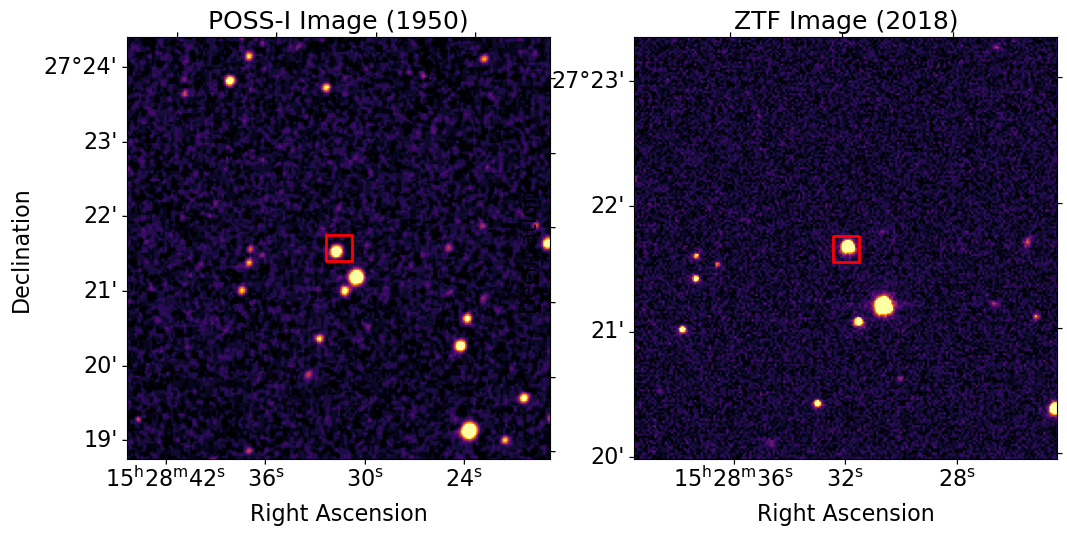

In [15]:
# Create a panel-style figure
fig = plt.figure(figsize=(12, 6))

# The POSS-I Image
ax1 = fig.add_subplot(121, projection=wcs1)
ax1.imshow(image_data_1, cmap="inferno", norm=LogNorm(vmin=np.percentile(image_data_1, 10), 
                                                      vmax=np.percentile(image_data_1, 99.8)))
ax1.set_xlabel("Right Ascension", fontsize=16)
ax1.set_ylabel("Declination", fontsize=16)
ax1.set_title("POSS-I Image (1950)", fontsize=18)
ax1.tick_params(axis='both', labelsize=16)

# The ZTF Image
ax2 = fig.add_subplot(122, projection=wcs2)
ax2.imshow(image_data_2, cmap="inferno", norm=LogNorm(vmin=np.percentile(image_data_2, 10), 
                                                      vmax=np.percentile(image_data_2, 99.8)))
ax2.set_xlabel("Right Ascension", fontsize=16)
ax2.set_ylabel("Declination", fontsize=16)
ax2.set_title("ZTF Image (2018)", fontsize=18)
ax2.tick_params(axis='both', labelsize=16)

# Target star coordinates (ICRS)
toi_coords = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')

# Convert world coordinates to pixel coordinates in both images
pixel_coords_1 = wcs1.world_to_pixel(toi_coords)
pixel_coords_2 = wcs2.world_to_pixel(toi_coords)

# Mark the target star in both images
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

# Define the zoom window width
zoom_width = 200  # in pixels

# Step 1: Get the center of the ZTF image zoom area
center_x_ztf = (ax2.get_xlim()[0] + ax2.get_xlim()[1]) / 2
center_y_ztf = (ax2.get_ylim()[0] + ax2.get_ylim()[1]) / 2

# Step 2: Convert the center of the ZTF zoom to world coordinates (RA, Dec)
center_world = wcs2.pixel_to_world(center_x_ztf, center_y_ztf)

# Step 3: Convert world coordinates to pixel coordinates in the POSS-I image
center_x_poss, center_y_poss = wcs1.world_to_pixel(center_world)

# Step 4: Define zoom limits in both images
zoom_x_min_poss = center_x_poss - zoom_width / 2
zoom_x_max_poss = center_x_poss + zoom_width / 2
zoom_y_min_poss = center_y_poss - zoom_width / 2
zoom_y_max_poss = center_y_poss + zoom_width / 2

zoom_x_min_ztf = center_x_ztf - zoom_width / 2
zoom_x_max_ztf = center_x_ztf + zoom_width / 2
zoom_y_min_ztf = center_y_ztf - zoom_width / 2
zoom_y_max_ztf = center_y_ztf + zoom_width / 2

# Apply zoom to both images
ax1.set_xlim(zoom_x_min_poss, zoom_x_max_poss)
ax1.set_ylim(zoom_y_min_poss, zoom_y_max_poss)

ax2.set_xlim(zoom_x_min_ztf, zoom_x_max_ztf)
ax2.set_ylim(zoom_y_min_ztf, zoom_y_max_ztf)
ax2.invert_yaxis()  # Maintain consistent orientation

plt.tight_layout()
plt.show()

/tmp/ipykernel_5544/3206976140.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


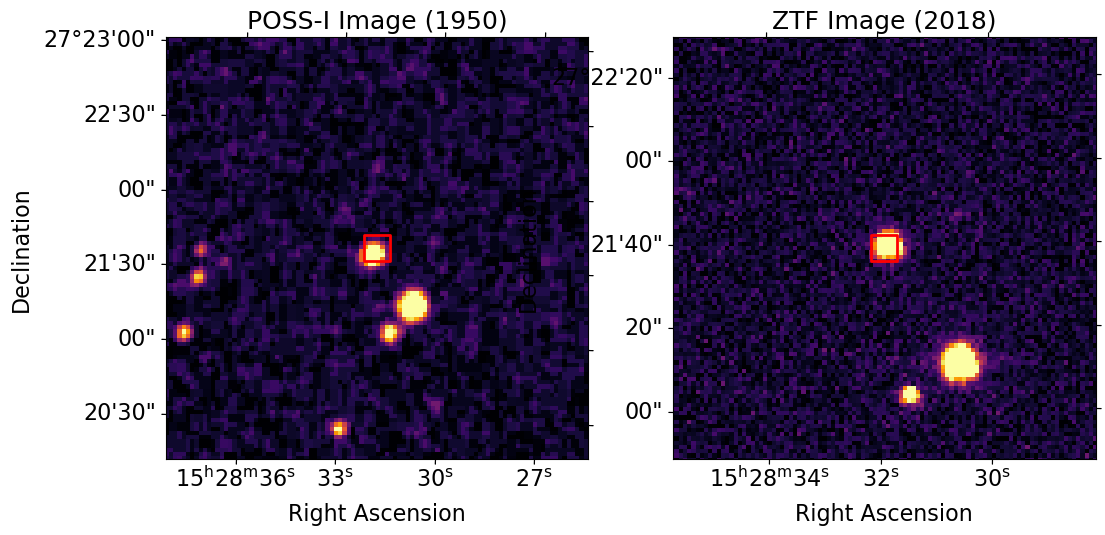

In [16]:
# Assuming image_data_1, image_data_2, wcs1, wcs2 are defined
fig = plt.figure(figsize=(12, 6))

# POSS-I Image (1950)
ax1 = fig.add_subplot(121, projection=wcs1)
ax1.imshow(image_data_1, cmap="inferno", norm=LogNorm(vmin=np.percentile(image_data_1, 10),
                                                       vmax=np.percentile(image_data_1, 99.8)))
ax1.set_xlabel("Right Ascension", fontsize=16)
ax1.set_ylabel("Declination", fontsize=16)
ax1.set_title("POSS-I Image (1950)", fontsize=18)
ax1.tick_params(axis='both', labelsize=16)

# ZTF Image (2018)
ax2 = fig.add_subplot(122, projection=wcs2)
ax2.imshow(image_data_2, cmap="inferno", norm=LogNorm(vmin=np.percentile(image_data_2, 10),
                                                       vmax=np.percentile(image_data_2, 99.8)))
ax2.set_xlabel("Right Ascension", fontsize=16)
ax2.set_ylabel("Declination", fontsize=16)
ax2.set_title("ZTF Image (2018)", fontsize=18)
ax2.tick_params(axis='both', labelsize=16)

# Target coordinates (ICRS, from SIMBAD)
toi_coords = SkyCoord('15h28m31.9s +27d21m38.8s', frame='icrs')

# Convert to pixel coordinates
pixel_coords_1 = wcs1.world_to_pixel(toi_coords)
pixel_coords_2 = wcs2.world_to_pixel(toi_coords)

# Plot the red square marker in both images
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

# Define zoom width
zoom_width = 100  # Adjust this if necessary

# Set zoomed-in limits centered on the target
ax1.set_xlim(pixel_coords_1[0] - zoom_width / 2, pixel_coords_1[0] + zoom_width / 2)
ax1.set_ylim(pixel_coords_1[1] - zoom_width / 2, pixel_coords_1[1] + zoom_width / 2)

ax2.set_xlim(pixel_coords_2[0] - zoom_width / 2, pixel_coords_2[0] + zoom_width / 2)
ax2.set_ylim(pixel_coords_2[1] - zoom_width / 2, pixel_coords_2[1] + zoom_width / 2)
ax2.invert_yaxis()  # Ensure proper orientation

plt.tight_layout()
plt.show()